In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
mpg = sns.load_dataset("mpg")

In [4]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
X = mpg.drop("mpg",axis = 1)
Y = mpg["mpg"]

In [6]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
Y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,random_state = 45)

In [9]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
178,4,120.0,88.0,2957,17.0,75,europe,peugeot 504
299,4,141.0,71.0,3190,24.8,79,europe,peugeot 504
360,6,145.0,76.0,3160,19.6,81,europe,volvo diesel
313,4,151.0,90.0,2678,16.5,80,usa,chevrolet citation
52,4,88.0,76.0,2065,14.5,71,europe,fiat 124b


In [10]:
num_features = ['displacement','horsepower','weight','acceleration']
X_train[num_features].corrwith(Y_train)

displacement   -0.808184
horsepower     -0.775395
weight         -0.833607
acceleration    0.417611
dtype: float64

In [11]:
df = X_train.copy()
df["mpg"] = Y_train

In [12]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg
178,4,120.0,88.0,2957,17.0,75,europe,peugeot 504,23.0
299,4,141.0,71.0,3190,24.8,79,europe,peugeot 504,27.2
360,6,145.0,76.0,3160,19.6,81,europe,volvo diesel,30.7
313,4,151.0,90.0,2678,16.5,80,usa,chevrolet citation,28.0
52,4,88.0,76.0,2065,14.5,71,europe,fiat 124b,30.0


In [13]:
df.groupby('cylinders')['mpg'].describe().style.background_gradient(cmap = "coolwarm")

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
3,4.000000,20.550000,2.564501,18.000000,18.750000,20.250000,22.050000,23.700000
4,183.000000,29.507104,5.743980,19.000000,25.000000,29.000000,33.250000,46.600000
5,2.000000,28.350000,11.384419,20.300000,24.325000,28.350000,32.375000,36.400000
6,79.000000,20.013924,3.861969,15.000000,18.000000,19.000000,21.000000,38.000000
8,90.000000,14.694444,2.441604,9.000000,13.000000,14.000000,16.000000,23.900000


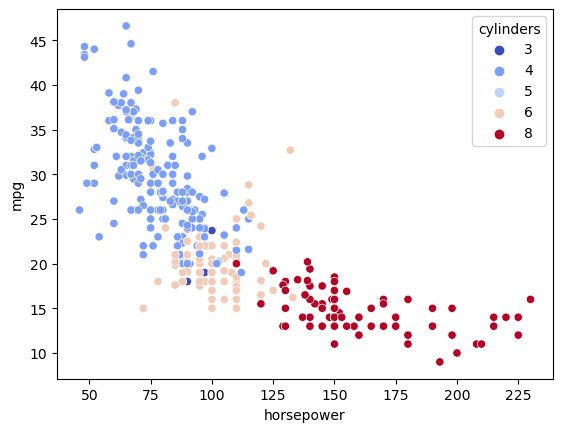

In [14]:
sns.scatterplot(x = "horsepower",y = "mpg",hue = "cylinders",data = df,palette = "coolwarm")
plt.show()

In [15]:
df.groupby('model_year')['mpg'].describe().style.background_gradient(cmap = "coolwarm")

,count,mean,std,min,25%,50%,75%,max
model_year,,,,,,,,
70,25.000000,17.840000,5.312564,9.000000,14.000000,16.000000,22.000000,27.000000
71,26.000000,21.269231,6.557790,12.000000,16.250000,19.000000,26.750000,35.000000
72,25.000000,18.800000,5.693564,11.000000,13.000000,19.000000,23.000000,28.000000
73,37.000000,16.945946,4.570108,11.000000,13.000000,16.000000,20.000000,29.000000
74,25.000000,22.320000,6.511016,13.000000,16.000000,24.000000,26.000000,32.000000
75,26.000000,20.346154,5.027463,13.000000,16.250000,19.500000,23.000000,33.000000
76,32.000000,21.500000,5.857171,13.000000,17.250000,21.000000,26.125000,33.000000
77,25.000000,23.800000,6.796139,15.000000,17.500000,22.000000,30.000000,36.000000
78,29.000000,24.124138,7.320941,16.200000,19.400000,20.600000,27.500000,43.100000


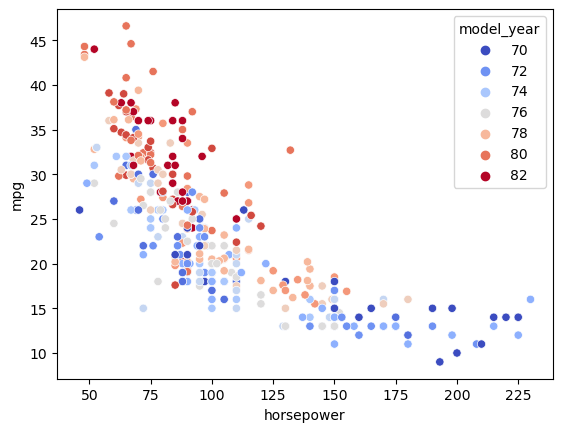

In [16]:
sns.scatterplot(x = "horsepower",y = "mpg",hue = "model_year",data = df,palette = "coolwarm")
plt.show()

In [17]:
df.groupby('origin')['mpg'].describe().style.background_gradient(cmap = "coolwarm")

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,60.000000,28.111667,7.065315,16.200000,23.000000,27.000000,31.125000,44.300000
japan,75.000000,30.260000,6.168096,18.000000,25.200000,31.300000,33.950000,46.600000
usa,223.000000,20.117040,6.526431,9.000000,15.000000,18.500000,24.400000,39.000000


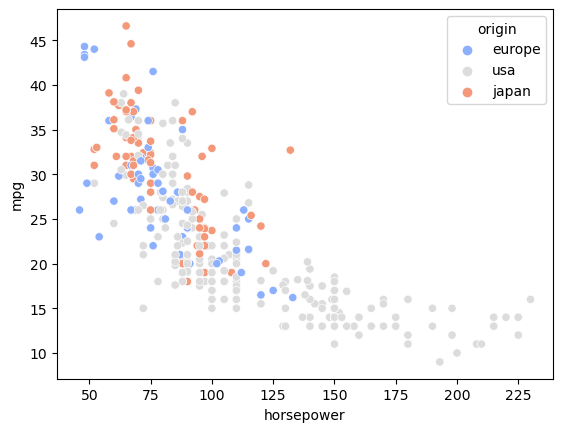

In [18]:
sns.scatterplot(x = "horsepower",y = "mpg",hue = "origin",data = df,palette = "coolwarm")
plt.show()

In [19]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [20]:
num_features = ['displacement','horsepower','weight','acceleration']
nominal_cat_features = ['origin']
ordinal_cat_features = ['cylinders']
custom_trans_features = ['name']
skip_features = ['model_year']

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [22]:
def rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))

In [23]:
class CompanyNameExtracter(BaseEstimator,TransformerMixin):
    def fit(self,X,Y = None):
        return self
    def transform(self,X,Y = None):
        X = X.copy()
        X.loc[:,'name'] = X["name"].apply(self.process_string)
        return X
    @staticmethod
    def process_string(value):
        map_d = {
            'maxda':'mazda',
            'toyouta':'toyota',
            'vokswagen':'vw',
            'volkswagen':'vw'
        }
        result = value.lower().strip().split(" ")
        name = result[0]
        if name in map_d.keys():
            name = map_d[name]
        return name

In [24]:
trans = CompanyNameExtracter()
temp_tr = trans.fit_transform(X_train)
X_train.tail(2)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
380,4,120.0,88.0,2160,14.5,82,japan,nissan stanza xe
131,4,71.0,65.0,1836,21.0,74,japan,toyota corolla 1200


In [25]:
temp_tr.tail(2)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
380,4,120.0,88.0,2160,14.5,82,japan,nissan
131,4,71.0,65.0,1836,21.0,74,japan,toyota


In [26]:
num_features = ['displacement','horsepower','weight','acceleration']
nominal_cat_features = ['origin']
ord_features = ['name']
pass_through_cols = ['cylinders']
drop_cols = ['model_year']

In [27]:
numerical_pipeline = Pipeline([("imputer",SimpleImputer()),("std scaler", StandardScaler())])
ordinal_pipeline = Pipeline([("extract company name",CompanyNameExtracter()),
                             ("ordinal encoder", OrdinalEncoder()),
                             ("std scaling", StandardScaler())])
nominal_pipeline = Pipeline([("one hot encoding", OneHotEncoder())])

In [28]:
pipeline = ColumnTransformer([
    ("numerical pipeline",numerical_pipeline,num_features),
    ("ordinal pipeline",ordinal_pipeline,ord_features),
    ("nominal pipeline",nominal_pipeline,nominal_cat_features),
    ("passing columns","passthrough",pass_through_cols),
    ("drop columns","drop",drop_cols)
])

output_cols = ['displacement','horsepower','weight','acceleration',
              "name","europe","japan","usa","cylinders"]

In [29]:
X_train.head(2)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
178,4,120.0,88.0,2957,17.0,75,europe,peugeot 504
299,4,141.0,71.0,3190,24.8,79,europe,peugeot 504


In [30]:
X_train_tr = pipeline.fit_transform(X_train)
X_train_tr = pd.DataFrame(X_train_tr,columns = output_cols)
X_train_tr.head(2)

,displacement,horsepower,weight,acceleration,name,europe,japan,usa,cylinders
0,-0.698363,-0.425187,-0.009257,0.512188,0.767647,1.0,0.0,0.0,4.0
1,-0.495700,-0.874554,0.266903,3.328719,0.767647,1.0,0.0,0.0,4.0


In [31]:
X_test_tr = pipeline.fit_transform(X_test)
X_test_tr = pd.DataFrame(X_test_tr,columns = output_cols)
X_test_tr.head(2)

,displacement,horsepower,weight,acceleration,name,europe,japan,usa,cylinders
0,-0.581526,-0.487122,-0.348657,-0.018187,0.116030,0.0,0.0,1.0,4.0
1,-0.978914,-1.002465,-1.108183,0.900753,1.276331,0.0,1.0,0.0,4.0


In [44]:
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [45]:
def generate_models_report(models,X_train_tr,Y_train,X_test_tr,Y_test):
    width = 116
    print("_"*width)
    title = "|{:^30}|{:^20}|{:^20}|{:^20}|{:^20}|"
    print(title.format("Model Name","Train Error","Test Error","Train Accuracy","Test Accuracy"))
    print("_"*width)
    row = "|{:^30}|{:^20.2f}|{:^20.2f}|{:^20.2f}|{:^20.2f}|"
    for model in models:
        model.fit(X_train_tr,Y_train)
        y_hat_train = model.predict(X_train_tr)
        y_hat_test = model.predict(X_test_tr)
        train_error = rmse(Y_train,y_hat_train)
        test_error = rmse(Y_test,y_hat_test)
        train_accuracy = r2_score(Y_train,y_hat_train)
        test_accuracy = r2_score(Y_test,y_hat_test)
        model_name = str(model)
        print(row.format(model_name,train_error,test_error,train_accuracy*100,test_accuracy*100))
        print("_"*width)

In [46]:
models = [LinearRegression(),SGDRegressor(),SVR(),DecisionTreeRegressor(), RandomForestRegressor()]

In [47]:
generate_models_report(models,X_train_tr,Y_train,X_test_tr,Y_test)

____________________________________________________________________________________________________________________
|          Model Name          |    Train Error     |     Test Error     |   Train Accuracy   |   Test Accuracy    |
____________________________________________________________________________________________________________________
|      LinearRegression()      |        4.20        |        3.64        |       71.92        |       69.93        |
____________________________________________________________________________________________________________________
|        SGDRegressor()        |        4.70        |        3.84        |       64.80        |       66.69        |
____________________________________________________________________________________________________________________
|            SVR()             |        4.21        |        3.82        |       71.82        |       66.92        |
________________________________________________________________

In [48]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [49]:
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0], 
}


In [50]:
model = Ridge()


In [51]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)


In [52]:
grid_search.fit(X_train_tr, Y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [53]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'alpha': 10.0}


In [54]:
best_model = grid_search.best_estimator_
print("Best Model:",best_model)

Best Model: Ridge(alpha=10.0)


In [55]:
y_pred_train = best_model.predict(X_train_tr)
y_pred_test = best_model.predict(X_test_tr)

In [56]:
train_accuracy = r2_score(Y_train,y_pred_train)
test_accuracy = r2_score(Y_test,y_pred_test)
print("Training Accuracy:",train_accuracy)
print("Testing Accuracy:",test_accuracy)

Training Accuracy: 0.7178438201732353
Testing Accuracy: 0.6904462373040845


In [57]:
from sklearn.linear_model import Lasso

In [58]:
model = Lasso()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)


In [59]:
grid_search.fit(X_train_tr, Y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [60]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'alpha': 0.1}


In [61]:
y_pred_train = best_model.predict(X_train_tr)
y_pred_test = best_model.predict(X_test_tr)

In [62]:
train_accuracy = r2_score(Y_train,y_pred_train)
test_accuracy = r2_score(Y_test,y_pred_test)
print("Training Accuracy:",train_accuracy)
print("Testing Accuracy:",test_accuracy)

Training Accuracy: 0.7178438201732353
Testing Accuracy: 0.6904462373040845


In [63]:
param_grid_sgd = {
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l1', 'l2']
}

param_grid_svr = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

In [64]:
sgd_model = SGDRegressor()
svr_model = SVR()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()

In [65]:
grid_search_sgd = GridSearchCV(estimator=sgd_model, param_grid=param_grid_sgd, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=1)

In [66]:
grid_search_sgd.fit(X_train_tr, Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'penalty': ['l1', 'l2']},
             scoring='neg_mean_squared_error', verbose=1)

In [67]:
grid_search_svr.fit(X_train_tr, Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error', verbose=1)

In [68]:
grid_search_dt.fit(X_train_tr, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [69]:
grid_search_rf.fit(X_train_tr, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [70]:
for model, grid_search in zip([sgd_model, svr_model, dt_model, rf_model], [grid_search_sgd, grid_search_svr, grid_search_dt, grid_search_rf]):
    best_params = grid_search.best_params_
    print("Best Hyperparameters for {}: {}".format(model.__class__.__name__, best_params))

Best Hyperparameters for SGDRegressor: {'alpha': 0.0001, 'penalty': 'l1'}
Best Hyperparameters for SVR: {'C': 10, 'kernel': 'rbf'}
Best Hyperparameters for DecisionTreeRegressor: {'max_depth': 10, 'min_samples_split': 10}
Best Hyperparameters for RandomForestRegressor: {'max_depth': None, 'n_estimators': 200}


In [71]:
best_model = grid_search_sgd.best_estimator_
print(best_model)

SGDRegressor(penalty='l1')


In [72]:
best_model = grid_search_svr.best_estimator_
print(best_model)

SVR(C=10)


In [73]:
best_model = grid_search_dt.best_estimator_
print(best_model)

DecisionTreeRegressor(max_depth=10, min_samples_split=10)


In [74]:
best_model = grid_search_rf.best_estimator_
print(best_model)

RandomForestRegressor(n_estimators=200)


In [75]:
Tunned_models = [SGDRegressor(alpha=0.01),SVR(C=10),DecisionTreeRegressor(max_depth=10, min_samples_split=10), RandomForestRegressor(max_depth=10, n_estimators=200)]

In [76]:
def generate_models_report_final(models,X_train_tr,Y_train,X_test_tr,Y_test):
    width = 145
    print("_"*width)
    title = "|{:^60}|{:^20}|{:^20}|{:^20}|{:^20}|"
    print(title.format("Model Name","Train Error","Test Error","Train Accuracy","Test Accuracy"))
    print("_"*width)
    row = "|{:^60}|{:^20.2f}|{:^20.2f}|{:^20.2f}|{:^20.2f}|"
    for model in models:
        model.fit(X_train_tr,Y_train)
        y_hat_train = model.predict(X_train_tr)
        y_hat_test = model.predict(X_test_tr)
        train_error = rmse(Y_train,y_hat_train)
        test_error = rmse(Y_test,y_hat_test)
        train_accuracy = r2_score(Y_train,y_hat_train)
        test_accuracy = r2_score(Y_test,y_hat_test)
        model_name = str(model)
        print(row.format(model_name,train_error,test_error,train_accuracy*100,test_accuracy*100))
        print("_"*width)

In [77]:
generate_models_report_final(Tunned_models,X_train_tr,Y_train,X_test_tr,Y_test)

_________________________________________________________________________________________________________________________________________________
|                         Model Name                         |    Train Error     |     Test Error     |   Train Accuracy   |   Test Accuracy    |
_________________________________________________________________________________________________________________________________________________
|                  SGDRegressor(alpha=0.01)                  |        4.57        |        3.84        |       66.77        |       66.60        |
_________________________________________________________________________________________________________________________________________________
|                         SVR(C=10)                          |        3.89        |        3.68        |       75.92        |       69.33        |
_________________________________________________________________________________________________________________________

In [78]:
model = LinearRegression()

In [79]:
model.fit(X_train_tr,Y_train)

LinearRegression()

In [80]:
y_hat_train = model.predict(X_train_tr)
y_hat_test = model.predict(X_test_tr)
train_error = rmse(Y_train,y_hat_train)
test_error = rmse(Y_test,y_hat_test)
train_accuracy = r2_score(Y_train,y_hat_train)
test_accuracy = r2_score(Y_test,y_hat_test)
train_accuracy = train_accuracy*100
test_accuracy = test_accuracy*100
accuracy_train_str = "{:.2f}".format(train_accuracy)
accuracy_test_str = "{:.2f}".format(test_accuracy)
print("Training Accuracy:",accuracy_train_str)
print("Testing Accuracy:",accuracy_test_str)

Training Accuracy: 71.92
Testing Accuracy: 69.93


In [32]:
cylinders = int(input("Enter the number of cylinders of the car:"))

Enter the number of cylinders of the car: 8


In [33]:
displacement = float(input("Enter the displacement of the car:"))

Enter the displacement of the car: 120.0


In [34]:
horsepower = float(input("Enter the horsepower of the car:"))

Enter the horsepower of the car: 132.4


In [35]:
weight = int(input("Enter the weight of the car:"))

Enter the weight of the car: 3000


In [36]:
acceleration = float(input("Enter the acceleration of the car:"))

Enter the acceleration of the car: 120.0


In [37]:
model_year = int(input("Enter the model year of the car:"))

Enter the model year of the car: 70


In [38]:
origin = input("Enter the origin of the car:")


Enter the origin of the car: europe


In [39]:
name = input("Enter the origin of the car:")

Enter the origin of the car: peugeot 504


In [40]:
data = {
    'cylinders ': [cylinders],
    'displacement': [displacement],
    'horsepower': [horsepower],
    'weight': [weight],
    'acceleration': [acceleration],
    'model_year': [model_year],
    'origin': [origin],
    'name': [name]
}


In [41]:
df = pd.DataFrame(data)


In [43]:
new_data = pipeline.transform(df)
new_data_tr = pd.DataFrame(new_data,columns = output_cols)

In [81]:
predicted_mileage = model.predict(new_data_tr)
mileage_value = predicted_mileage[0]
mileage = round(mileage_value, 2)
print(f"Predicted Mileage:{mileage}Km/L")

Predicted Mileage:21.7Km/L
